# Object Oriented Programming and File I/O
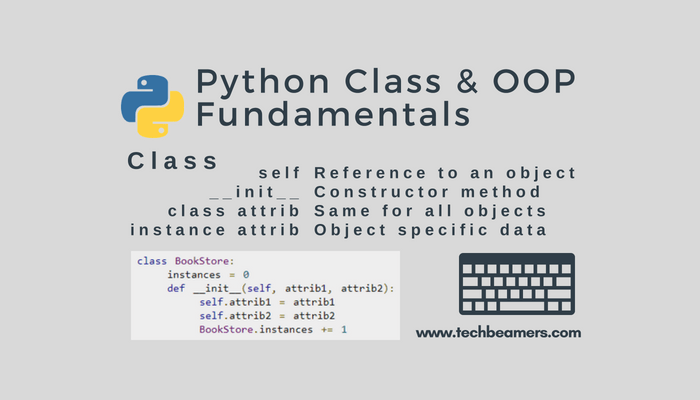

__Object Oriented Programming (OOP)__ is a programming paradigm that allows abstraction through the concept of interacting entities. This programming works contradictory to conventional model and is procedural, in which programs are organized as a sequence of commands or statements to perform.

We can think an object as an entity that resides in memory, has a state and it's able to perform some actions. 
 
More formally objects are entities that represent **instances** of a general abstract concept called **class**. In `Python`, "attributes" are the variables defining an object state and the possible actions are called "methods".

In Python, everything is an object also classes and functions.

## 1 How to define classes

### 1.1 Creating a class

Suppose we want to create a class, named Person, as a prototype, a sort of template for any number of 'Person' objects (instances).

The following python syntax defines a class:

    class ClassName(base_classes):
        statements

        

Class names should always be uppercase (it's a naming convention).

Say we need to model a Person as:

* Name
* Surname  
* Age  

In [ ]:
class hatchback_car:
    wheels = 4
    bootspace = medium
    color = "Black"

    ## Methods:
    def drive():
        < 150kmph
    def auto_parking()
    
    def automatic_bootopen():
        

In [3]:
class Person:
    pass

john_doe = Person()
john_doe.name = "Alec"
john_doe.surname = "Baldwin"
john_doe.year_of_birth = 1958


print(john_doe)
print("%s %s was born in %d." %
      (john_doe.name, john_doe.surname, john_doe.year_of_birth))

Alec Baldwin was born in 1958.


The following example defines an empty class (i.e. the class doesn't have a state) called _Person_ then creates a _Person_ instance called _john_doe_ and adds three attributes to _john_doe_. We see that we can access objects attributes using the "dot" operator.

This isn't a recommended style because classes should describe homogeneous entities. A way to do so is the following:

In [6]:
class Person:
    def __init__(self, name, surname, year_of_birth):
        self.name = name
        self.surname = surname
        self.year_of_birth = year_of_birth

    __init__(self, ...)
Is a special _Python_ method that is automatically called after an object construction. Its purpose is to initialize every object state. The first argument (by convention) __self__ is automatically passed either and refers to the object itself.

In the preceding example, `__init__` adds three attributes to every object that is instantiated. So the class is actually describing each object's state.


We cannot directly manipulate any class rather we need to create an instance of the class: 

In [11]:
alec = Person("Alec", "Baldwin", 1958)
print(alec)
print(alec.name,alec.surname, alec.year_of_birth )



Alec Baldwin 1958



We have just created an instance of the Person class, bound to the variable `alec`. 

### 1.2 Methods

In [18]:
class Person:
    def __init__(self, name, surname, year_of_birth,profession):
        self.name = name
        self.surname = surname
        self.year_of_birth = year_of_birth
        self.profession = profession
        
    def age(self, current_year):
        return current_year - self.year_of_birth
    
    def __str__(self):
        return "%s %s was born in %d ." %(self.name, self.surname, self.year_of_birth)
    
alec = Person("Alec", "Baldwin", 1958,"CA")
print(alec)
print(alec.age(2020))


Alec Baldwin was born in 1958 .
62


In [20]:
print(alec)

Alec Baldwin was born in 1958 .


We defined two more methods `age` and  `__str__`. The latter is once again a special method that is called by Python when the object has to be represented as a string (e.g. when has to be printed). If the `__str__` method isn't defined the **print** command shows the type of object and its address in memory. We can see that in order to call a method we use the same syntax for attributes (**instance_name.instance _method**).

### 1.3 Bad practice

It is possible to create a class without the `__init__` method, but this is not a recommended style because classes should describe homogeneous entities.

In [16]:
class Person:
  
    def set_name(self, name):
        self.name = name
        
    def set_surname(self, surname):
        self.surname = surname
        
    def set_year_of_birth(self, year_of_birth):
        self.year_of_birth = year_of_birth
        
    def age(self, current_year):
        return current_year - self.year_of_birth
    
    def __str__(self):
        return "%s %s was born in %d ." \
                % (self.name, self.surname, self.year_of_birth)
    

In this case, an empty instance of the class Person is created, and no attributes have been initialized while instantiating:

In [6]:
president = Person()

In [7]:
# This code will raise an attribute error:
print(president.name)

AttributeError: 'Person' object has no attribute 'name'

This raises an Attribute Error... We need to set the attributes:

In [8]:
president.set_name('John')
president.set_surname('Doe')
president.set_year_of_birth(1940)

In [9]:
print('Mr', president.name, president.surname,
      'is the president, and he is very old. He is',
      president.age(2014))

Mr John Doe is the president, and he is very old. He is 74


### 1.4 Protect your abstraction

Here the instance attributes shouldn't be accessible by the end user of an object as they are powerful mean of abstraction they should not reveal the internal implementation detail. In Python, there is no specific strict mechanism to protect object attributes but the official guidelines suggest that a variable that has an underscore prefix should be treated as 'Private'.

Moreover prepending two underscores to a variable name makes the interpreter mangle a little the variable name.

In [10]:
class Person:
    def __init__(self, name, surname, year_of_birth):
        self._name = name
        self._surname = surname
        self._year_of_birth = year_of_birth
    
    def age(self, current_year):
        return current_year - self._year_of_birth
    
    def __str__(self):
        return "%s %s and was born %d." \
                % (self._name, self._surname, self._year_of_birth)
    
alec = Person("Alec", "Baldwin", 1958)
print(alec)
print(alec.age(2014))

Alec Baldwin and was born 1958.
56


In [21]:
class Person:
    def __init__(self, name, surname, year_of_birth):
        self.__name = name
        self.__surname = surname
        self.__year_of_birth = year_of_birth
    
    def age(self, current_year):
        return current_year - self.__year_of_birth
    
    def __str__(self):
        return "%s %s and was born %d." \
                % (self.__name, self.__surname, self.__year_of_birth)
    
alec = Person("Alec", "Baldwin", 1958)
print(alec.__dict__.keys())

dict_keys(['_Person__name', '_Person__surname', '_Person__year_of_birth'])


`__dict__` is a special attribute is a dictionary containing each attribute of an object. We can see that prepending two underscores every key has `_ClassName__` prepended.

## 2 Inheritance

Once a class is defined it models a concept. It is useful to extend a class behavior to model a less general concept. Say we need to model a Student, but we know that every student is also a Person so we shouldn't model the Person again but inherit from it instead.

In [23]:
class Student(Person):
    def __init__(self, student_id, *args, **kwargs):
        super(Student, self).__init__(*args, **kwargs)
        self._student_id = student_id
        
charlie = Student(100, 'Charlie', 'Brown', 2006)
print(charlie)
print(type(charlie))
print(isinstance(charlie, Person))
print(isinstance(charlie, object))


Charlie Brown and was born 2006.
<class '__main__.Student'>
True
True


Charlie now has the same behavior of a Person, but his state has also a student ID. A Person is one of the base classes of Student and Student is one of the sub classes of Person. Be aware that a subclass knows about its superclasses but the converse isn't true.

A sub class doesn't only inherits from its base classes, but from its base classes too, forming an inheritance tree that starts from a object (every class base class).

    super(Class, instance)
    
is a function that returns a proxy-object that delegates method calls to a parent or sibling class of type.
So we used it to access Person's `__init__`.

### 2.1 Overriding methods

Inheritance allows to add new methods to a subclass but often is useful to change the behavior of a method defined in the superclass. To override a method just define it again.

In [30]:
class Student(Person):
    def __init__(self, student_id, *args, **kwargs):
        super(Student, self).__init__(*args, **kwargs)
        self._student_id = student_id
    def percentage(self,marks):
        return (marks/500)*100
    def __str__(self):
        return super(Student, self).__str__() + " And has ID: %d" % self._student_id
        
charlie = Student(1, 'Charlie', 'Brown', 1993)
print(charlie)
charlie.age(2021)
charlie.percentage(275)

Charlie Brown and was born 1993. And has ID: 1


55.00000000000001

We defined `__str__` again overriding the one wrote in Person, but we wanted to extend it, so we used super to achieve our goal.

## 3 Encapsulation

Encapsulation is an another powerful way to extend a class which consists on wrapping an object with a second one.
There are two main reasons to use encapsulation:
* Composition
* Dynamic Extension


### 3.1 Composition

The abstraction process relies on creating a simplified model that remove useless details from a concept. In order to be simplified, a model should be described in terms of other simpler concepts.
For example, we can say that a car is composed by:
* Tyres
* Engine
* Body

And break down each one of these elements in simpler parts until we reach primitive data.

In [32]:
class Tyres:
    def __init__(self, branch, belted_bias, opt_pressure):
        self.branch = branch
        self.belted_bias = belted_bias
        self.opt_pressure = opt_pressure
        
    def __str__(self):
        return ("Tyres: \n \tBranch: " + self.branch +
               "\n \tBelted-bias: " + str(self.belted_bias) + 
               "\n \tOptimal pressure: " + str(self.opt_pressure))
        
class Engine:
    def __init__(self, fuel_type, noise_level):
        self.fuel_type = fuel_type
        self.noise_level = noise_level
        
    def __str__(self):
        return ("Engine: \n \tFuel type: " + self.fuel_type +
                "\n \tNoise level:" + str(self.noise_level))
        
class Body:
    def __init__(self, size):
        self.size = size
        
    def __str__(self):
        return "Body:\n \tSize: " + self.size
        
class Car:
    def __init__(self, tyres, engine, body):
        self.tyres = tyres
        self.engine = engine
        self.body = body
        
    def __str__(self):
        return str(self.tyres) + "\n" + str(self.engine) + "\n" + str(self.body)

        
t = Tyres('Pirelli', True, 2.0)
e = Engine('Diesel', 3)
b = Body('Medium')
c = Car(t, e, b)
print(c)

Tyres: 
 	Branch: Pirelli
 	Belted-bias: True
 	Optimal pressure: 2.0
Engine: 
 	Fuel type: Diesel
 	Noise level:3
Body:
 	Size: Medium


### 3.2 Dynamic Extension

Sometimes it's necessary to model a concept that may be a subclass of another one, but it isn't possible to know which class should be its superclass until runtime.

#### 3.2.1 Example

Suppose we want to model a simple dog school that trains instructors too. It will be nice to re-use Person and Student but students can be dogs or peoples. So we can remodel it this way:

In [33]:
class Dog:
    def __init__(self, name, year_of_birth, breed):
        self._name = name
        self._year_of_birth = year_of_birth
        self._breed = breed

    def __str__(self):
        return "%s is a %s born in %d." % (self._name, self._breed, self._year_of_birth)

kudrjavka = Dog("Kudrjavka", 1954, "Laika")
print(kudrjavka)

Kudrjavka is a Laika born in 1954.


In [35]:
class Student:
    def __init__(self, anagraphic, student_id):
        self._anagraphic = anagraphic
        self._student_id = student_id
    def __str__(self):
        return str(self._anagraphic) + " Student ID: %d" % self._student_id


alec_student = Student(alec, 1)
kudrjavka_student = Student(kudrjavka, 2)

print(alec_student)
print(kudrjavka_student)


Alec Baldwin and was born 1958. Student ID: 1
Kudrjavka is a Laika born in 1954. Student ID: 2


## 4 Polymorphism and DuckTyping

`Python` uses dynamic typing which is also called as duck typing. If an object implements a method you can use it, irrespective of the type. This is different from statically typed languages, where the type of a construct need to be explicitly declared. Polymorphism is the ability to use the same syntax for objects of different types:

In [39]:
def summer(a, b):
    return a + b

print(summer(1, 1))
print(summer(["a", "b", "c"], [1, "e"]))
print(summer("abra", "cadabra"))


2
['a', 'b', 'c', 1, 'e']
abracadabra


## 5 How long does a class should be?

There is an Object Oriented Programming (OOP) principle called Single Responsibility Principle (SRP) and it states: "A class should have one single responsibility" or "A class should have only one reason to change". 

If you come across a class which doesn't follow the SRP principle, you should spilt it. You will be grateful to SRP during your software maintenance. 

# Files

Python uses file objects to interact with the external files on your computer. These file objects cab be of any file format on your computer i.e. can be an audio file, a text file, emails, Excel documents, etc. Note that You will probably need to install certain libraries or modules to interact with those various file types, but they are easily available. (We will cover downloading modules later on in the course).

Python has a built-in open function that allows us to open and play with basic file types. First we will need a file though. We're going to use some iPython magic to create a text file!

## iPython Writing a File

In [43]:
%%writefile test.txt
Hello, this is a quick test file Good morning Hello

Overwriting test.txt


## Python Opening a file

We can open a file with the open() function. This function also takes in arguments (also called parameters). Let's see how this is used:

In [44]:
# Open the text.txt we made earlier
my_file = open('test.txt')

In [45]:
# We can now read the file
my_file.read()

'Hello, this is a quick test file Good morning Hello\n'

In [34]:
# But what happens if we try to read it again?
my_file.read()

''

This happens because you can imagine the reading "cursor" is at the end of the file after having read it. So there is nothing left to read. We can reset the "cursor" like this:

In [38]:
# Seek to the start of file (index 0)
my_file.seek(0)

0

In [47]:
# Now read again
my_file.read()

''

In order to not have to reset every time, we can also use the readlines method. Use caution with large files, since everything will be held in memory. We will learn how to iterate over large files later in the course.

In [48]:
# Seek to the start of file (index 0)
my_file.seek(0)

0

In [49]:
# Readlines returns a list of the lines in the file.
my_file.readlines()

['Hello, this is a quick test file Good morning Hello\n']

## Writing to a File

By default, using the open() function will only allow us to read the file, we need to pass the argument 'w' to write over the file. For example:

In [50]:
# Add the second argument to the function, 'w' which stands for write
my_file = open('test.txt','w+')

In [51]:
# Write to the file
my_file.write('This is a new line')

18

In [52]:
# Seek to the start of file (index 0)
my_file.seek(0)

0

In [53]:
# Read the file
my_file.read()

'This is a new line'

## Iterating through a File

Let's get a quick preview of a for loop by iterating over a text file. First, let's make a new text file with some iPython Magic:

In [54]:
%%writefile test.txt
First Line
Second Line

Overwriting test.txt


Now we can use a little bit of flow to tell the program to for through every line of the file and do something:

In [55]:
for line in open('test.txt'):
    print(line)

First Line

Second Line



In [56]:
# Pertaining to the first point above
for asdf in open('test.txt'):
    print(asdf)

First Line

Second Line



# StringIO 

The StringIO module implements an in-memory filelike object. This object can then be used as input or output to most functions that would expect a standard file object.

The best way to show this is by example:

In [6]:
from io import StringIO

In [7]:
# Arbitrary String
message = 'This is just a normal string.'

In [8]:
# Use StringIO method to set as file object
f = StringIO(message)

Now we have an object *f* that we will be able to treat just like a file. For example:

In [9]:
f.read()

'This is just a normal string.'

We can also write to it

In [10]:
f.write(' Second line written to file like object')

40

In [11]:
# Reset cursor just like you would a file
f.seek(0)

0

In [12]:
# Read again
f.read()

'This is just a normal string. Second line written to file like object'